# What we not to do during Weight Initialization
1. Zero weight Initialization : due to no training of neural networks
2. Non Zero weight Initialization: model will behave like linear and unable to capture pattern in non linear data
3. Random Initialization with small Weights: duet to vanishing gradient problem and slow convergence problem.
4. Random Initialization with large Weights: VGP (when activation is tanh, sigmoid) and Exploding Gradient Problem (when activation function is ReLu)

# What can be Done for Weight Initialization ?
## Xavier / Glorat Weight initialization method:
- Suitable for **tanh, sigmoid, Softmax** activation function , it's give better result.
- Variance for Xavier (Normal) = 2/ ( fan_in + fan_out )
- Variance for Xavier (Uniform) = 6/ ( fan_in + fan_out )

 Where 
 1. fan_in ---> number of input coming to the node 
 2. fan_out ---> number of output from the current node

## Xavier / Glorat Weights initialization method:
- Suitable for **ReLU, Leaky ReLU, ELU** activation function , it's give better result.
- Variance for Xavier (Normal) = 2/ fan_in
- Variance for Xavier (Uniform) = 6/ fan_in

In [26]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ushape/ushape.csv


In [27]:
df = pd.read_csv("/kaggle/input/ushape/ushape.csv")

In [28]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [29]:
# rename the columns
df.rename(columns = {"3.159499363321345566e-02":"X","9.869877579082642072e-01":"Y","0.000000000000000000e+00":"class"},inplace = True)

In [30]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [31]:
df.shape

(99, 3)

In [32]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

In [33]:
df.duplicated().sum()

0

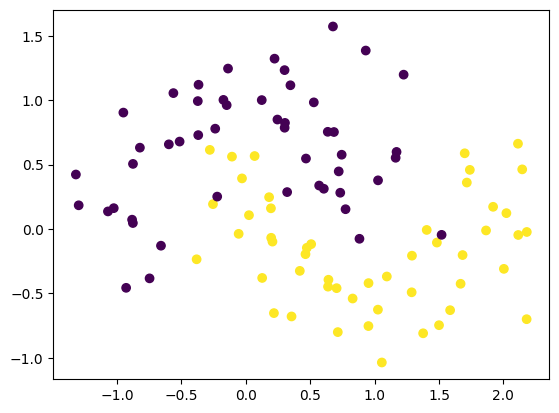

In [34]:
plt.scatter(df['X'],df['Y'],c = df['class'])

In [35]:
X = df.iloc[:,0:2].values
y =df.iloc[:,-1].values

In [36]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Xavier / Glorat Weight Initialization:

In [15]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.get_weights()

[array([[-0.26077268, -0.5464524 ,  0.5398838 ,  0.02399218, -0.58426166,
          0.31802195, -0.5944255 , -0.42748198,  0.05220294, -0.65762824],
        [-0.4823088 ,  0.48459786,  0.35199565,  0.04101259, -0.6957553 ,
         -0.0007084 ,  0.6241459 ,  0.22332132, -0.60415936, -0.45884684]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.11695603,  0.47715247,  0.31202656, -0.42840606, -0.04273927,
         -0.19844508,  0.0251776 , -0.10841927, -0.1940687 ,  0.44733387],
        [ 0.01272953, -0.1803582 ,  0.5263233 ,  0.21598858,  0.2569121 ,
          0.40763944,  0.12781501, -0.31876162, -0.07715484,  0.1451258 ],
        [ 0.47202766, -0.49106666, -0.06305876,  0.00339854,  0.02837557,
          0.09897417, -0.3990425 , -0.02959812,  0.13284194, -0.10720456],
        [ 0.25180942, -0.26111782,  0.35099447, -0.2127381 , -0.38730294,
         -0.05149236,  0.5136397 ,  0.16038227, -0.5285733 ,  0.41518635],
        [-0.26763

In [18]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[-0.7798503 ,  0.24211067, -1.6062071 , -0.4451496 ,  0.4700348 ,
         -1.169827  , -0.7325895 ,  0.5538408 , -0.2280693 ,  0.08097035],
        [-0.84292835, -0.45878956,  1.0555627 , -0.62049997,  1.0232675 ,
         -0.05734697,  0.15919495, -1.2084624 ,  0.37368688, -0.8221676 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.25833026,  0.40208858, -0.59622985,  0.492444  ,  0.23769337,
         -0.02513338, -0.26255023,  0.49100026, -0.21798982,  0.24983437],
        [ 0.14425546, -0.53357106, -0.1267648 , -0.6280723 , -0.20012929,
         -0.03250135,  0.4146972 , -0.12186077,  0.23711225,  0.14640097],
        [ 0.45730948, -0.17201318, -0.2071278 ,  0.25528613, -0.0800027 ,
          0.51108617,  0.32734087, -0.32701346,  0.10699013,  0.08815153],
        [ 0.26761806, -0.24842414, -0.23826303, -0.05502707,  0.10129242,
          0.37247318,  0.41694793, -0.27380255, -0.19175483, -0.37671724],
        [-0.22482

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.2302 - loss: 0.7488 - val_accuracy: 0.3000 - val_loss: 0.7193
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3184 - loss: 0.7189 - val_accuracy: 0.6000 - val_loss: 0.6909
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5982 - loss: 0.7007 - val_accuracy: 0.8000 - val_loss: 0.6654
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6416 - loss: 0.6834 - val_accuracy: 0.8500 - val_loss: 0.6404
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7021 - loss: 0.6593 - val_accuracy: 0.8500 - val_loss: 0.6164
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7045 - loss: 0.6463 - val_accuracy: 0.8500 - val_loss: 0.5939
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7382 - loss: 0.6265 - val_accuracy: 0.8500 - val_loss: 0.5724
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7382 - loss: 0.6039 - val_accuracy: 0.8500 - val_loss

In [24]:
model.get_weights()

[array([[-0.6742915 ,  0.22625588, -1.4346573 , -0.5753846 ,  0.5122727 ,
         -0.973758  , -0.60606444,  0.5471947 , -0.29224384, -0.00796162],
        [-0.90431803, -0.41252038,  1.1502743 , -0.59477806,  1.1341673 ,
          0.05492952,  0.31223804, -1.2599543 ,  0.44944423, -0.7775281 ]],
       dtype=float32),
 array([ 0.09776258, -0.09280646, -0.05691088, -0.13501252, -0.04544058,
        -0.04583327,  0.00501298, -0.06615927,  0.02852072, -0.04149519],
       dtype=float32),
 array([[-0.1686052 ,  0.31907704, -0.47022715,  0.44818386,  0.26345417,
         -0.11421474, -0.164599  ,  0.48940185, -0.23130763,  0.1118679 ],
        [ 0.07798003, -0.6378888 , -0.05879743, -0.5673207 , -0.09015078,
         -0.1351971 ,  0.5644328 , -0.01570181,  0.1603339 ,  0.22283435],
        [ 0.5434894 , -0.25772172, -0.21129434,  0.16482419, -0.1292324 ,
          0.517956  ,  0.32235312, -0.36492556,  0.1857571 , -0.02681345],
        [ 0.3496717 , -0.31074065, -0.15456955, -0.11310787, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

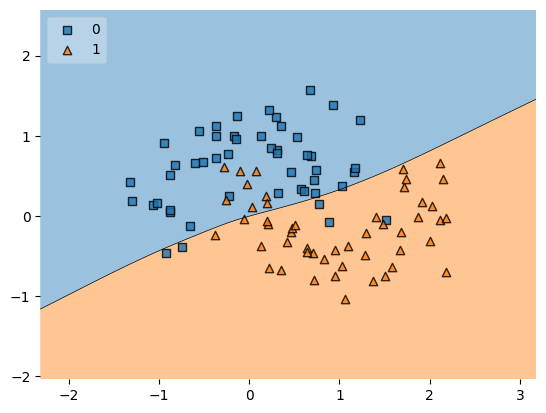

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# He Weight Initialization:

In [38]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.get_weights()

[array([[ 1.6786632e-01,  1.8464193e-01,  1.4126139e+00,  3.6458015e-01,
         -9.6715313e-01,  2.6969579e-01, -1.9286265e+00, -1.7830931e+00,
         -8.2567704e-01,  1.4056250e-01],
        [ 4.1942105e-01, -2.0859618e-01,  1.7685468e+00,  6.8319613e-01,
          1.6320801e+00, -1.7377979e+00, -1.3772545e+00, -1.3674524e+00,
          3.3635801e-01,  3.0884851e-04]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.15529706,  0.7446074 , -0.08964994,  0.34119478, -0.44137925,
         -0.81021404, -0.95104796,  0.89012116, -0.24712662,  0.37085938],
        [-0.03968757,  0.02213368,  0.27811033, -0.0171162 , -0.09657131,
          0.25771743, -0.08541479,  0.6342064 ,  0.31502584, -0.72719795],
        [ 0.57036906, -0.8943742 ,  0.00252986,  0.23063765,  0.22829351,
          0.10362755,  0.9553359 ,  0.03504667,  0.54834723, -0.16985391],
        [-0.11911881,  0.16642259, -0.3294233 ,  0.19969293,  0.66875666,
          0.11651663,

In [41]:
initial_weights = model.get_weights()

In [42]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [43]:
model.set_weights(initial_weights)

In [44]:
model.get_weights()

[array([[ 0.7690285 , -0.7747259 ,  0.08531432, -0.4786111 , -0.29978868,
         -0.42156404, -0.60922   ,  0.0464793 , -0.02749341,  0.4995697 ],
        [ 1.1473316 , -1.3125029 ,  0.20372686, -0.08903034,  0.8419717 ,
         -0.76906073, -0.35373044, -0.05347657, -0.33206037,  0.1515666 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.65313259e-01, -2.58500755e-01,  1.90743595e-01,
          2.37059429e-01, -1.88364554e-02,  1.53016910e-01,
          9.64359865e-02,  3.76346856e-02,  1.28489852e-01,
         -3.01371276e-01],
        [-1.49212658e-01,  8.88206214e-02, -1.04890745e-02,
          5.23089707e-01,  3.68805796e-01,  1.34141929e-02,
         -4.56131808e-02, -1.50235787e-01, -1.56113347e-02,
          5.64605510e-03],
        [ 2.42880434e-01, -3.99829559e-02, -3.35980445e-01,
         -2.40501806e-01, -1.91112943e-02,  7.21585691e-01,
         -1.74664393e-01,  1.10878848e-01,  6.53979853e-02,
          2.6317703

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.4680 - loss: 0.7445 - val_accuracy: 0.5000 - val_loss: 0.7274
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4993 - loss: 0.7217 - val_accuracy: 0.5000 - val_loss: 0.7207
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5032 - loss: 0.7159 - val_accuracy: 0.5000 - val_loss: 0.7140
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5188 - loss: 0.7043 - val_accuracy: 0.5000 - val_loss: 0.7075
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5007 - loss: 0.7035 - val_accuracy: 0.5000 - val_loss: 0.7014
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5086 - loss: 0.6946 - val_accuracy: 0.4500 - val_loss: 0.6956
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4890 - loss: 0.6997 - val_accuracy: 0.4500 - val_loss: 0.6906
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4890 - loss: 0.6955 - val_accuracy: 0.4000 - val_loss

In [47]:
model.get_weights()

[array([[ 0.9018774 , -0.56572825,  0.18337384, -0.5213003 , -0.25343937,
         -0.28507558, -0.7963704 ,  0.00417261,  0.17011282,  0.59867877],
        [ 1.1422325 , -1.5301445 ,  0.2543999 , -0.00836128,  0.9596828 ,
         -0.9654957 , -0.41021612, -0.01309296, -0.5057079 ,  0.03344079]],
       dtype=float32),
 array([-0.01389676,  0.23442456,  0.2921634 , -0.03512423,  0.09456652,
         0.18062389, -0.05047945, -0.04176094,  0.15788195, -0.06110433],
       dtype=float32),
 array([[ 0.2596885 , -0.08499689,  0.10246791,  0.26628327,  0.1133481 ,
          0.08437161,  0.09643599,  0.04398768,  0.1823321 , -0.34311342],
        [-0.4491142 ,  0.12834208,  0.2315949 ,  0.4767255 ,  0.42048928,
          0.03950688, -0.0600721 , -0.0838415 ,  0.11655105,  0.08645324],
        [ 0.36119166,  0.15243782, -0.47029504, -0.21759592,  0.10284155,
          0.691653  , -0.1746644 ,  0.18532372,  0.13263832,  0.38500044],
        [-0.26922438,  0.28629524, -0.28938356,  0.34986898, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

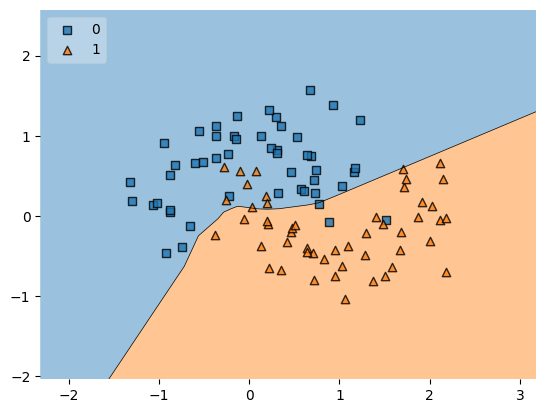

In [48]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf= model,legend=2)

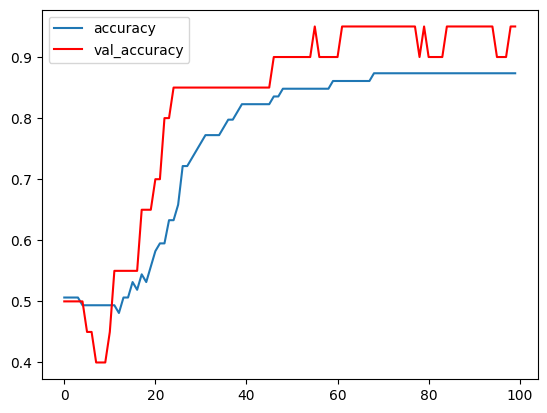

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='red')
plt.legend(['accuracy','val_accuracy'])

In [55]:
(np.random.randn(10,10)*0.01).min()

-0.02886823981190443

In [56]:
(np.random.randn(10,10)*0.01).max()

0.028537764716339724